In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp
import scikitplot as skplt
from collections import Counter
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,BaseNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.svm import NuSVC,NuSVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier,
                              GradientBoostingRegressor,
                              AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve,
                             auc,
                             confusion_matrix,
                             recall_score,
                             roc_auc_score,
                             accuracy_score,
                             balanced_accuracy_score,
                             classification_report,
                             f1_score,
                             precision_recall_fscore_support)
from sklearn.preprocessing import label_binarize,OneHotEncoder,MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
%matplotlib inline

Using TensorFlow backend.


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",verticalalignment ="center",fontsize=30,multialignment="center"
                 ,color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [3]:
# some global variables
n_neighbors = 3
models = {'Naive Bayes':[],
          'KNN':[],
          'LDA':[],
          'QDA':[],
          'Linear SVM':[],
          'Non Linear SVM':[],
          'Logistic Regression':[],
          'CART':[],
          'Random Forest':[],
          'AdaBoost':[],
          'GradBoost':[]}

In [4]:
#Loading the data
data = pd.read_csv('D:/m2/app_sup/projet_app_sup_20/Datasets_projet_MLDS/VisaPremier.txt',delimiter='\t')
data

,matricul,departem,ptvente,sexe,age,sitfamil,anciente,csp,codeqlt,nbimpaye,...,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,cartevp,sexer,cartevpr,nbjdebit
0,148009,31,1,Shom,51,Fmar,238,Pcad,A,0,...,0,14,2,0,1303700,556967,Coui,0,1,1
1,442153,82,6,Shom,52,Fmar,270,Pcad,A,0,...,19500000,5,2,0,19856243,133896,Coui,0,1,0
2,552427,97,1,Shom,58,Fmar,139,Pcad,C,0,...,0,0,1,0,122745,0,Coui,0,1,0
3,556005,40,1,Shom,27,Fcel,99,Psan,B,0,...,0,14,2,0,83224,0,Coui,0,1,0
4,556686,65,1,Shom,49,Fsep,89,Pemp,A,0,...,0,11,3,1,494773,21423,Coui,0,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,7567726,31,1,Sfem,38,Fmar,23,Psan,.,0,...,0,.,0,0,0,0,Cnon,1,0,0
1069,7572458,31,1,Sfem,43,Fmar,27,Pcad,.,0,...,0,.,0,0,10685,0,Cnon,1,0,0
1070,7574479,32,1,Sfem,49,Fmar,31,Pemp,B,0,...,0,9,1,0,63336,0,Cnon,1,0,9
1071,7580358,65,3,Sfem,27,F.,192,Psan,D,0,...,0,2,1,0,27897,0,Cnon,1,0,38


In [5]:
to_drop = ['cartevpr','departem','sexe' ,'sitfamil'  ,  
'csp'  ,     
'codeqlt'  , 
'agemvt','nbpaiecb'  ,  
'cartevp','matricul','age','sexer']

In [6]:
label=data['cartevpr']

In [7]:
data_smote  = data.drop(to_drop,axis=1)

In [8]:
x = data_smote.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_c_n = pd.concat([pd.DataFrame(x_scaled),pd.DataFrame(label.values)],axis=1)
#data_c_n=data_c_n[0:759]
data_c_n

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,0
0,0.000000,0.272727,0.0,1.0,0.000000,0.005874,0.723648,0.040404,0.034327,0.0000,...,0.0,0.0,0.0,0.0,0.4,0.00,0.065657,0.078817,0.007463,1
1,0.833333,0.309551,0.0,1.0,0.142857,1.000000,0.009196,0.000000,0.000000,0.0000,...,0.0,0.0,1.0,1.0,0.4,0.00,1.000000,0.018948,0.000000,1
2,0.000000,0.158803,0.0,1.0,0.000000,0.002043,0.003507,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.2,0.00,0.006182,0.000000,0.000000,1
3,0.000000,0.112773,0.0,1.0,0.000000,0.000868,0.078681,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.4,0.00,0.004191,0.000000,0.000000,1
4,0.000000,0.101266,0.0,1.0,0.000000,0.019102,0.487990,0.000000,0.060197,0.0756,...,0.0,0.0,0.0,0.0,0.6,0.25,0.024918,0.003032,0.111940,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,0.000000,0.025316,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.000000,0
1069,0.000000,0.029919,0.0,1.0,0.000000,0.000000,0.011015,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.00,0.000538,0.000000,0.000000,0
1070,0.000000,0.034522,0.0,1.0,0.142857,0.000715,0.057572,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.2,0.00,0.003190,0.000000,0.067164,0
1071,0.333333,0.219793,0.0,1.0,0.071429,0.000409,0.025404,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.2,0.00,0.001405,0.000000,0.283582,0


In [9]:
# Check for missing values 
np.any(data_c_n.isnull().values)

False

In [10]:
def results_report(model,y_te,y_te_binarised,y_pred,y_pred_binarized):
    metrics={'acc':0,
         'bal_acc':0,
         'recall':0,
         'f_1_score':0,
         'roc_auc_score':0}
    #y_pred = model.predict(x_te)
    metrics['acc']=accuracy_score(y_te,y_pred)
    metrics['bal_acc']=accuracy_score(y_te,y_pred)
    metrics['recall']=recall_score(y_te,y_pred,average='macro')
    metrics['f_1_score']=f1_score(y_te,y_pred,average='macro')
    metrics['roc_auc_score']=roc_auc_score(y_te,y_pred)
    
    plt.bar(metrics.keys(),metrics.values())
    plt.show()
    return metrics

def results_report_cross_val(model,y_te,y_te_binarised,y_pred,y_pred_binarized,x):
    metrics={'acc':0,
         'bal_acc':0,
         'recall':0,
         'f_1_score':0,
         'roc_auc_score':0}
    #y_pred = model.predict(x_te)
    
    metrics['acc']=cross_val_score(model, x,y_te, cv=5, scoring=make_scorer(accuracy_score)).mean()
    metrics['bal_acc']=cross_val_score(model, x,y_te, cv=5, scoring=make_scorer(balanced_accuracy_score)).mean()
    metrics['recall']=cross_val_score(model, x,y_te, cv=5, scoring='recall_macro').mean()
    metrics['f_1_score']=cross_val_score(model, x,y_te, cv=5, scoring='f1_macro').mean()
    metrics['roc_auc_score']=cross_val_score(model, x,y_te, cv=5, scoring=make_scorer(roc_auc_score)).mean()
    
    plt.bar(metrics.keys(),metrics.values())
    plt.show()
    return metrics

def plot_curves(model,y_true,y_pred,y_probas=None):
    #y_pred = model.predict(x_te)
    cnf_matrix = confusion_matrix(y_true,y_pred)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['have_card','No_card'],
                      title='Confusion matrix')

    
    #predict_proba = getattr(model, "predict_proba", None)
    if (y_probas is not None):
        y_probas = model.predict_proba(x_te)
        skplt.metrics.plot_roc(y_true, y_probas)
        skplt.metrics.plot_precision_recall(y_true,y_probas)

In [11]:
# splittign the dataset
#Change data_c_s to data_c_n to use normalized data
x_t,x_te,y_t,y_te = train_test_split(data_c_n.values[:,:-1],
                                     data_c_n.values[:,-1],
                                     test_size=0.33, 
                                     random_state=42)
classes = list(set(y_te).union(set(y_t)))
y_te_bin = label_binarize(y_te,classes)

# Naive Bayes classifier

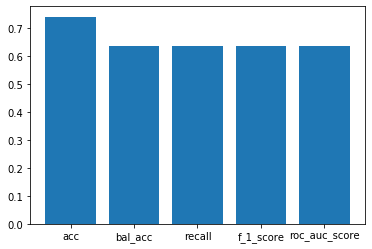

{'acc': 0.7395493395493397, 'bal_acc': 0.6369651048570912, 'recall': 0.6369651048570912, 'f_1_score': 0.6354058971115106, 'roc_auc_score': 0.6369651048570912}
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83       229
         1.0       0.71      0.55      0.62       126

    accuracy                           0.76       355
   macro avg       0.75      0.71      0.72       355
weighted avg       0.76      0.76      0.75       355



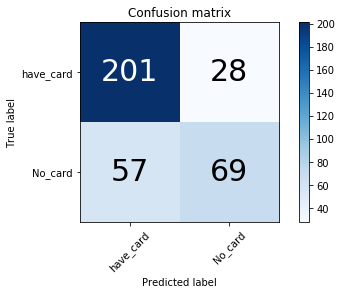

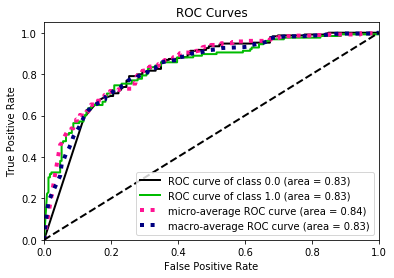

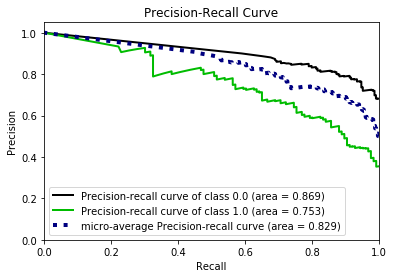

In [12]:
NB_model = GaussianNB()

#evaluating the model
NB_model.fit(x_t,y_t)
y_pred =cross_val_predict(NB_model, x_te, y_te, cv=3)
predict_proba = getattr(NB_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = NB_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(NB_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['Naive Bayes']=r
#ax.set_ylim(interp.data.c - .5, - .5)
plot_curves(NB_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

# KNN

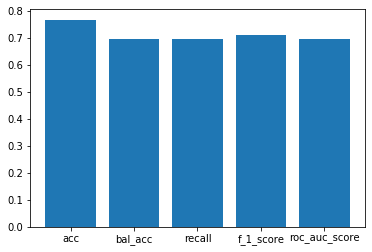

{'acc': 0.7659576534576534, 'bal_acc': 0.6961738367490964, 'recall': 0.6961738367490964, 'f_1_score': 0.7086222977705454, 'roc_auc_score': 0.6961738367490964}
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.82       229
         1.0       0.71      0.52      0.60       126

    accuracy                           0.75       355
   macro avg       0.74      0.70      0.71       355
weighted avg       0.75      0.75      0.74       355



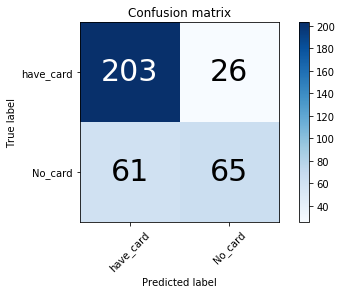

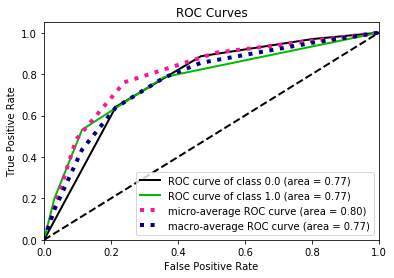

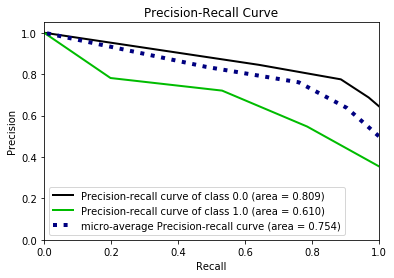

In [13]:


KNN_model = KNeighborsClassifier(n_neighbors=n_neighbors)
# fitting the model
KNN_model.fit(x_t,y_t)
#evaluating the model
y_pred =cross_val_predict(KNN_model, x_te, y_te, cv=3)
predict_proba = getattr(KNN_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = KNN_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(KNN_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['KNN']=r
#ax.set_ylim(interp.data.c - .5, - .5)
plot_curves(KNN_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))


# LDA

D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables ar

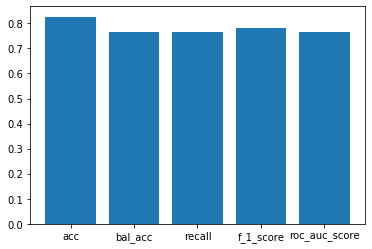

{'acc': 0.8258547008547008, 'bal_acc': 0.7651406200825887, 'recall': 0.7651406200825887, 'f_1_score': 0.7827442601924858, 'roc_auc_score': 0.7651406200825887}
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89       229
         1.0       0.91      0.63      0.74       126

    accuracy                           0.85       355
   macro avg       0.87      0.80      0.82       355
weighted avg       0.85      0.85      0.84       355



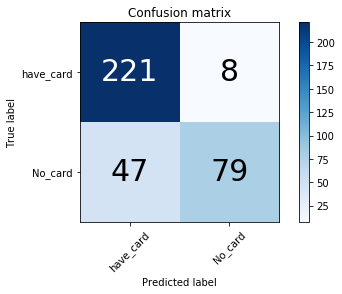

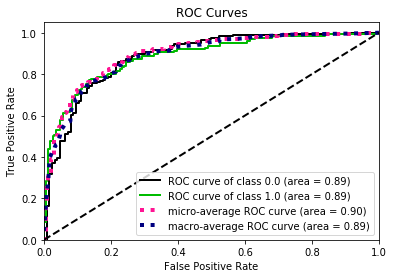

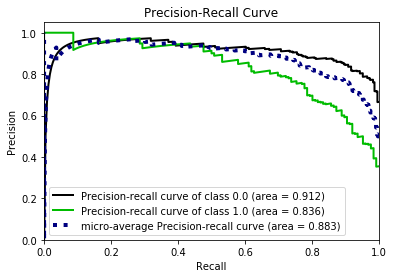

In [14]:
LDA_model = LinearDiscriminantAnalysis()
# fitting the model
LDA_model.fit(x_t,y_t)
#evaluating the model
y_pred =cross_val_predict(LDA_model , x_te, y_te, cv=3)
predict_proba = getattr(LDA_model , "predict_proba", None)
if callable(predict_proba):
    y_probas = LDA_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(LDA_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['LDA']=r
plot_curves(LDA_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))



# QDA

D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\annaconda\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear


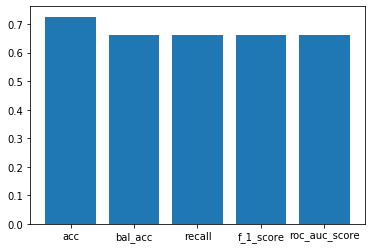

{'acc': 0.7257672882672883, 'bal_acc': 0.6632180016594028, 'recall': 0.6632180016594028, 'f_1_score': 0.6628539698459768, 'roc_auc_score': 0.6632180016594028}
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76       229
         1.0       0.57      0.68      0.62       126

    accuracy                           0.71       355
   macro avg       0.69      0.70      0.69       355
weighted avg       0.72      0.71      0.71       355



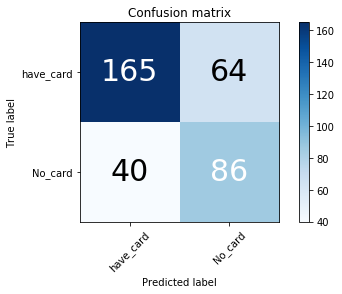

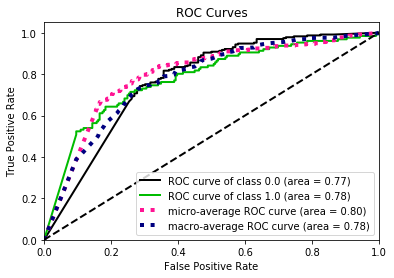

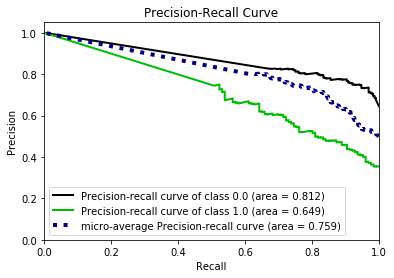

In [15]:
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(QDA_model , x_te, y_te, cv=3)
predict_proba = getattr(QDA_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = QDA_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(QDA_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['QDA']=r
plot_curves(QDA_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))



# Linear SVM

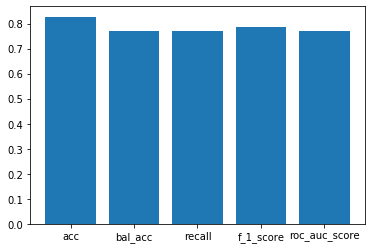

{'acc': 0.8272727272727272, 'bal_acc': 0.7706047283443166, 'recall': 0.7706047283443166, 'f_1_score': 0.7871569357281106, 'roc_auc_score': 0.7706047283443166}
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       229
         1.0       0.87      0.63      0.73       126

    accuracy                           0.83       355
   macro avg       0.85      0.79      0.80       355
weighted avg       0.84      0.83      0.83       355



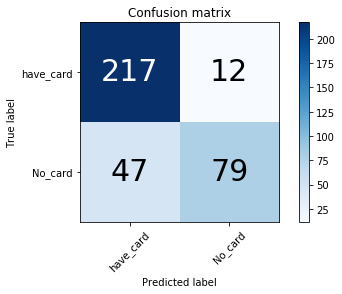

In [16]:
LSVM_model = LinearSVC()
LSVM_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(LSVM_model , x_te, y_te, cv=3)
predict_proba = getattr(LSVM_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = LSVM_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(LSVM_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['Linear SVM']=r
plot_curves(LSVM_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

# Non Linear SVM

D:\annaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\annaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\annaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\annaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

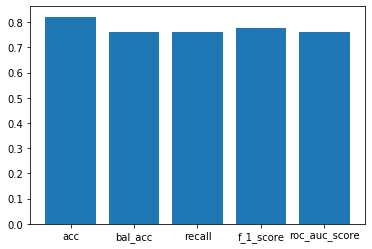

{'acc': 0.8217171717171718, 'bal_acc': 0.7598543730986009, 'recall': 0.7598543730986009, 'f_1_score': 0.7773613324889115, 'roc_auc_score': 0.7598543730986009}
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88       229
         1.0       0.89      0.62      0.73       126

    accuracy                           0.84       355
   macro avg       0.85      0.79      0.81       355
weighted avg       0.84      0.84      0.83       355



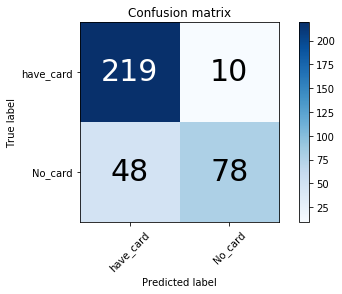

In [17]:
NLSVM_model = NuSVC()
NLSVM_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(NLSVM_model , x_te, y_te, cv=3)
predict_proba = getattr(NLSVM_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = NLSVM_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(NLSVM_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['Non Linear SVM']=r
plot_curves(NLSVM_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

# Logistic Regression

D:\annaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\annaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\annaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\annaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\annaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\annaconda\lib\site-packages

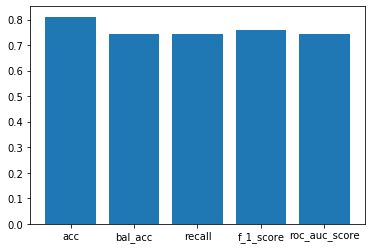

{'acc': 0.810576923076923, 'bal_acc': 0.7415976043564092, 'recall': 0.7415976043564092, 'f_1_score': 0.7607025979794134, 'roc_auc_score': 0.7415976043564092}
              precision    recall  f1-score   support

         0.0       0.76      0.96      0.85       229
         1.0       0.86      0.45      0.59       126

    accuracy                           0.78       355
   macro avg       0.81      0.71      0.72       355
weighted avg       0.80      0.78      0.76       355



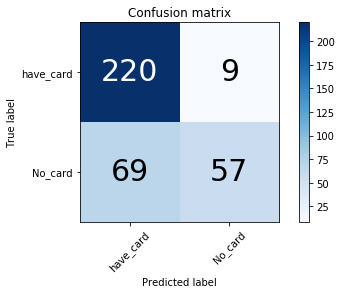

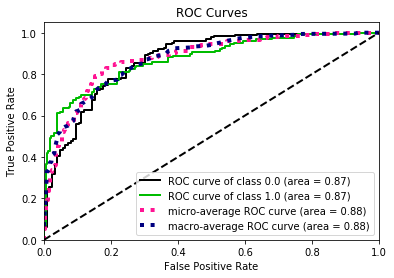

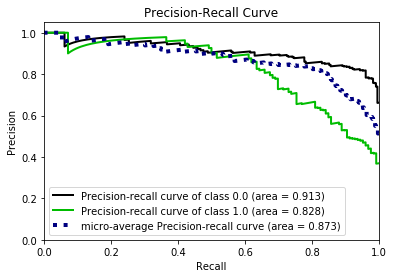

In [18]:
LR_model = LogisticRegression()
LR_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(LR_model , x_te, y_te, cv=3)
predict_proba = getattr(LR_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = LR_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(LR_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['Logistic Regression']=r
plot_curves(LR_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))



# CART

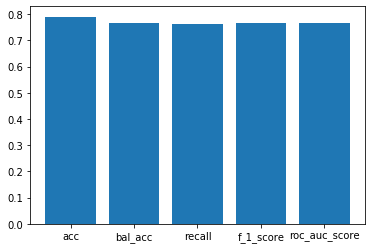

{'acc': 0.7896853146853147, 'bal_acc': 0.7659078554602935, 'recall': 0.7618962014934625, 'f_1_score': 0.7669966509104599, 'roc_auc_score': 0.7649427315296069}
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81       229
         1.0       0.65      0.68      0.66       126

    accuracy                           0.75       355
   macro avg       0.73      0.74      0.74       355
weighted avg       0.76      0.75      0.76       355



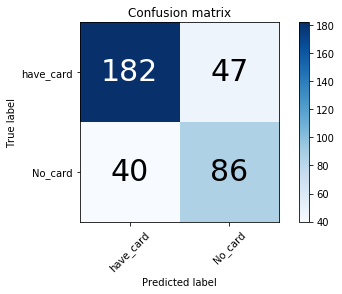

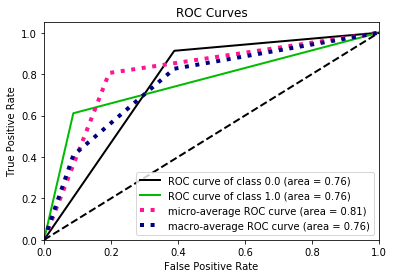

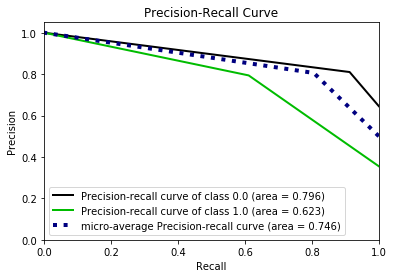

In [19]:
CART_model = DecisionTreeClassifier()
CART_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(CART_model , x_te, y_te, cv=3)
predict_proba = getattr(CART_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = CART_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(CART_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['CART']=r
plot_curves(CART_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))



# Random Forest

D:\annaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


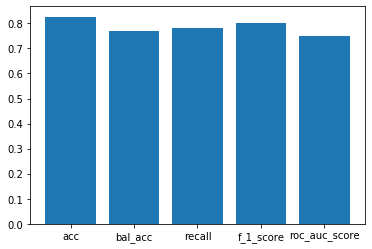

{'acc': 0.8258158508158508, 'bal_acc': 0.7700806813088301, 'recall': 0.7804557635637106, 'f_1_score': 0.8025737057332997, 'roc_auc_score': 0.7508001373298873}
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       229
         1.0       0.85      0.65      0.74       126

    accuracy                           0.83       355
   macro avg       0.84      0.79      0.81       355
weighted avg       0.84      0.83      0.83       355



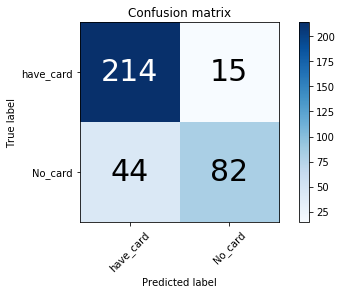

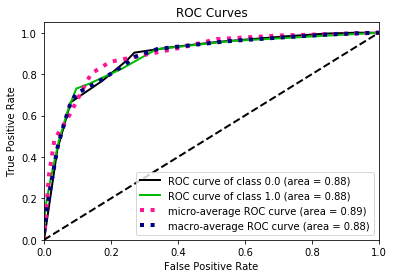

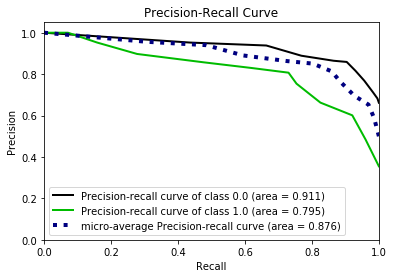

In [20]:
RF_model = RandomForestClassifier()
RF_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(RF_model , x_te, y_te, cv=3)
predict_proba = getattr(RF_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = RF_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(RF_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['Random Forest']=r
plot_curves(RF_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

# Ada Boost

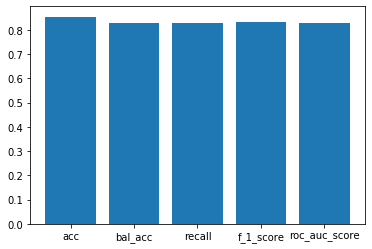

{'acc': 0.8537296037296038, 'bal_acc': 0.8300714306150281, 'recall': 0.8278975175715498, 'f_1_score': 0.8309953772074321, 'roc_auc_score': 0.8278975175715498}
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       229
         1.0       0.76      0.72      0.74       126

    accuracy                           0.82       355
   macro avg       0.81      0.80      0.80       355
weighted avg       0.82      0.82      0.82       355



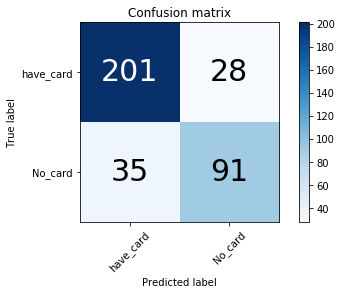

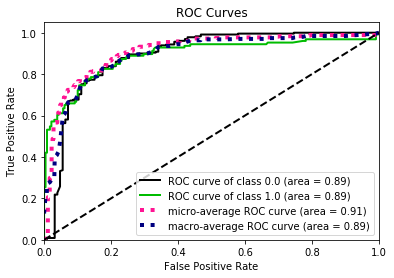

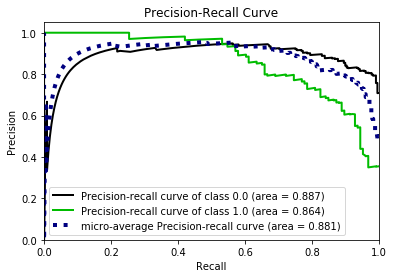

In [21]:
AB_model = AdaBoostClassifier()
AB_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(AB_model , x_te, y_te, cv=3)
predict_proba = getattr(AB_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = AB_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(AB_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['AdaBoost']=r
plot_curves(AB_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

# Gradient Boost

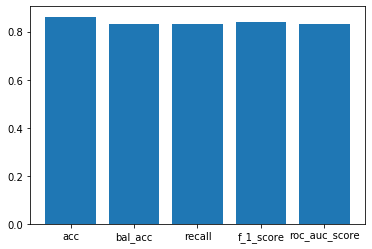

{'acc': 0.8621017871017871, 'bal_acc': 0.8319358745720361, 'recall': 0.8330326063114526, 'f_1_score': 0.8387192147582265, 'roc_auc_score': 0.8309049467369846}
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       229
         1.0       0.82      0.72      0.77       126

    accuracy                           0.85       355
   macro avg       0.84      0.82      0.83       355
weighted avg       0.84      0.85      0.84       355



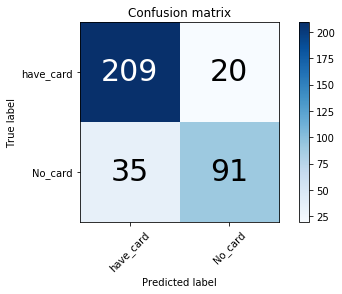

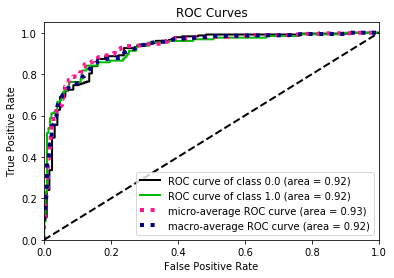

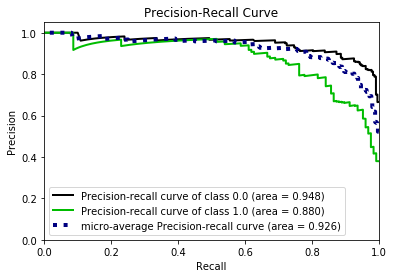

In [22]:
GB_model = GradientBoostingClassifier()
GB_model.fit(x_t,y_t)
#evaluating the model 
y_pred =cross_val_predict(GB_model , x_te, y_te, cv=3)
predict_proba = getattr(GB_model, "predict_proba", None)
if callable(predict_proba):
    y_probas = GB_model.predict_proba(x_te)
else:
    y_probas = None
y_pred_bin = label_binarize(y_pred,classes)
r = results_report_cross_val(GB_model,
                   y_t,
                   y_te_bin,
                   y_pred,
                   y_pred_bin,x_t)
print(r)
models['GradBoost']=r
plot_curves(GB_model,y_te,y_pred,y_probas)
print(classification_report(y_te,
                            y_pred,
                            labels=classes))

In [23]:
m = pd.DataFrame.from_dict(models).T
m = m.sort_values(by =list(m),ascending=False)
m

,acc,bal_acc,recall,f_1_score,roc_auc_score
GradBoost,0.862102,0.831936,0.833033,0.838719,0.830905
AdaBoost,0.853730,0.830071,0.827898,0.830995,0.827898
Linear SVM,0.827273,0.770605,0.770605,0.787157,0.770605
LDA,0.825855,0.765141,0.765141,0.782744,0.765141
Random Forest,0.825816,0.770081,0.780456,0.802574,0.750800
Non Linear SVM,0.821717,0.759854,0.759854,0.777361,0.759854
Logistic Regression,0.810577,0.741598,0.741598,0.760703,0.741598
CART,0.789685,0.765908,0.761896,0.766997,0.764943
KNN,0.765958,0.696174,0.696174,0.708622,0.696174
Naive Bayes,0.739549,0.636965,0.636965,0.635406,0.636965


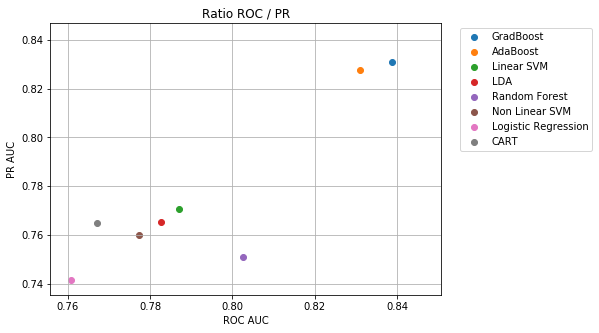

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
for i in range(0,11):
    
    
    if (m['f_1_score'][i] > 0.7 and m['roc_auc_score'][i] > 0.7):
        ax.scatter(m['f_1_score'][i],m['roc_auc_score'][i], label=m.index.values[i], marker="o")
ax.legend(loc=0, bbox_to_anchor=(1.40,1))
ax.set_title("Ratio ROC / PR")
ax.set_ylabel("PR AUC")
ax.set_xlabel("ROC AUC")
ax.grid(True)

